### Day 2

-	Data types
-	Measures of central tendency
-	Hypothesis testing
-	Power calculation
-	P-values


In [1]:
%matplotlib inline
import matplotlib.pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
import pandas as pd
import numpy as np
import datetime
import math

In [2]:
# Load some data

heart = pd.read_csv("Datasets/HeartAttacks/heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

### Data Points: Heart Attacks Data Set

- **age**: age in years
- **sex**: sex (1 = male; 0 = female)
- **cp**: chest pain type: 1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic
- **trtbps**: resting blood pressure (in mmHg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results: 0 normal, 1 ST-T wave abnormality (T inversion and/or ST elevation or depression of > 0.05 mV), 2 probable or definite LVH by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment: 1 upsloping, 2 flat, 3 downsloping
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **num**: diagnosis of heart disease (angiographic disease status): 0 < 50% narrowing, 1 > 50% narrowing in any major vessel

### Data types

- **age**: continuous, ratio
- **sex**: categorical, nominal
- **cp**: categorical, nominal
- **trtbps**: continuous, interval
- **chol**: continuous, interval
- **fbs**: categorical, ordinal
- **restecg**: categorical, ordinal
- **thalach**: continuous, ratio
- **exang**: categorical, ordinal
- **oldpeak**: continuous, ratio
- **slope**: categorical, nominal
- **ca**: continuous, ratio (count)
- **thal**: categorical, nominal 
- **num**: categorical, nominal (outcome) 

In [4]:
h_desc = heart.describe()
h_desc.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000


In [5]:
heart_mct = h_desc.transpose()

heart_mct["IQR"] = heart_mct["75%"] - heart_mct["25%"]
heart_mct["range"] = heart_mct["max"] - heart_mct["min"]
heart_mct["var"] = heart_mct["std"]*heart_mct["std"]

heart_mct.head()

,count,mean,std,min,25%,50%,75%,max,IQR,range,var
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0,13.5,48.0,82.484558
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.217166
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0,2.0,3.0,1.065132
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0,20.0,106.0,307.586453
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0,63.5,438.0,2686.426748


In [6]:
#divide data into male vs. female sets

males = heart[heart["sex"]==1].copy()
females = heart[heart["sex"]==0].copy()

males.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [7]:
females.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [8]:
print(males.shape)
print(females.shape)

(207, 14)
(96, 14)


### Power calculation (aka 'sensitivity')

How many rows do I need for 80% power, and what does that mean?

**It is important to perform this step BEFORE hypothesis testing, otherwise, I don't really know if I can be reasonably certain of my conclusions.**

The statistical power of a study (sometimes called sensitivity) is **how likely the study is to distinguish an actual effect from one caused by random chance**. 

As the power increases, the probability of making a Type II error decreases.
Type II error is when we fail to reject the NULL hypothesis when it is false; also called a 'false negative'.
Beta is the maximum probability of a Type II (false negative) error. 

Power = 1 - Beta

**To increase the power of a test, you may do any of the following:**

- Increase the effect size (the difference between the null and alternative values) to be detected
- Increase the sample size(s)
- Decrease the variability in the sample(s)
- Increase the significance level (alpha) of the test 

### P-value - the probability of a Type I error

- Probability of Type I error: probability of rejecting the NULL hypothesis when it is true.
- Probability of observing the result given that the null hypothesis is true.
- Probability of obtaining a result **equal to or more extreme than was observed in the data**.
- The result of a significance test is claimed to be “statistically significant” if the p-value is less than the significance level (alpha). This means that the null hypothesis (that there is no result) is rejected.

#### Summary:

- p <= alpha: reject H0, different distribution.
- p > alpha: fail to reject H0, same distribution.
- Significance level (alpha): Boundary for specifying a statistically significant finding when interpreting the p-value.

### Hypothesis Testing

There must be a hypothesis to test, for power and statistical significance to matter.

For example, the NULL hypothesis (H0) for the Pearson’s Correlation test is that **there is no relationship between two variables**. 

The NULL hypothesis (H0) for the Student’s t test is that **there is no difference between the means of two populations**.

Let's try:
1. Calculating power
2. Setting alpha
3. Stating hypotheses 
4. Conducting a test

In [9]:
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

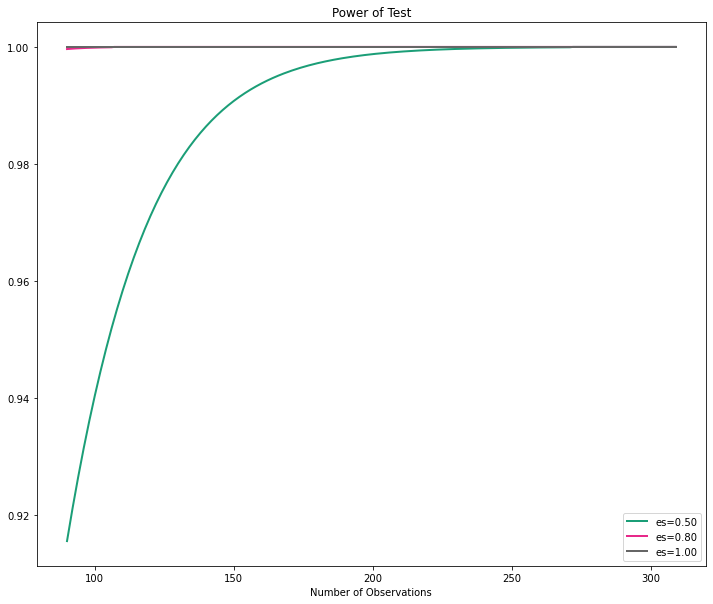

In [10]:
# Power curves for a Correlation test: age x chol

effect_sizes = np.array([0.5, 0.8, 1.0])
sample_sizes = np.array(range(90, 310))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

In [11]:
heart_mct.at["age", "IQR"]

13.5

In [12]:
# Select data and remove outliers using IQR

agechol_df = heart[(heart["chol"].notnull()) & (heart["chol"]< heart_mct.at["chol", "50%"] + 1.5*heart_mct.at["chol", "IQR"]) & 
            (heart["chol"]> heart_mct.at["chol", "50%"] - 1.5*heart_mct.at["chol", "IQR"])][["age", "chol"]].reset_index()

agechol_df = agechol_df.drop(columns=["index"], axis=1)
age = agechol_df["age"]
chol = agechol_df["chol"]

print(age.shape)
print(chol.shape)

(289,)
(289,)


In [13]:
from statsmodels.stats.power import TTestPower

# Exact power for Correlation test with 148 instances

power = TTestPower()
n_test = power.solve_power(nobs=289, effect_size = 0.8,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


In [14]:
# Great!  Looks like we have sufficient power.  We'll set alpha to 0.05...

# H0: There is no significant relationship between age and chol
# HA: There is a significant relationship between age and chol at alpha=0.05

import scipy.stats as stats

r = stats.pearsonr(age, chol)
print(r)

(0.18419743610038686, 0.001662365770970183)


### Pearson correlation

Based on the output, we can see that there is a weak positive correlation between age and cholesterol (0.18), and that relationship is statistically significant at alpha=0.05, with a p-value of 0.0017!



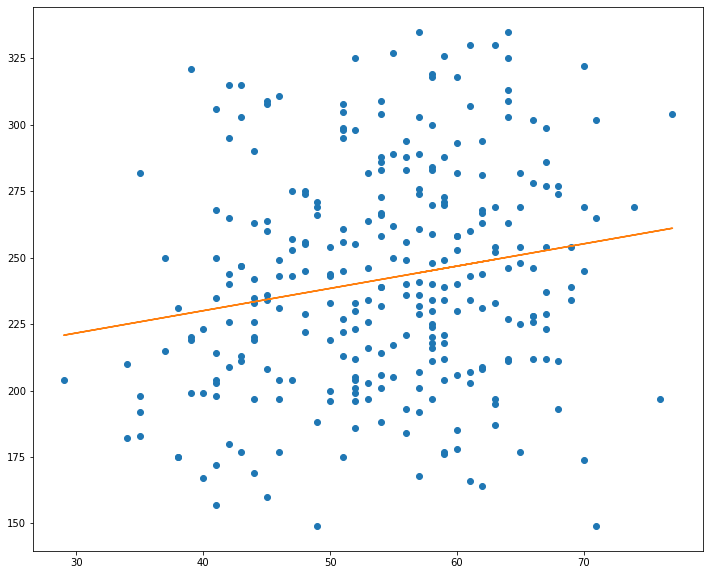

In [15]:
plt.plot(age, chol, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(age, chol, 1)

#add linear regression line to scatterplot 
plt.plot(age, m*age+b)

### Student's T-test

Now, let's perform a student's T test on males vs. females, to see if there is a statistically significant difference in trtbps - resting blood pressure on admission in mmHg.

H0: There is no difference in mean trestbps between males and females.

HA: There is a statistically significant difference at alpha=0.05.

In [16]:
ratio = females.shape[0]/males.shape[0]
print(ratio)

0.463768115942029


In [17]:
# Calculate power

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=ratio, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 40.063


In [18]:
# The minimum # of samples for 80% power is 41, so we are all set!

# Let's see what type of T-test we need to use

f_desc = females.describe()
f_mct = f_desc.transpose()

f_mct["IQR"] = f_mct["75%"] - f_mct["25%"]
f_mct["range"] = f_mct["max"] - f_mct["min"]
f_mct["var"] = f_mct["std"]*f_mct["std"]

m_desc = males.describe()
m_mct = m_desc.transpose()

m_mct["IQR"] = m_mct["75%"] - m_mct["25%"]
m_mct["range"] = m_mct["max"] - m_mct["min"]
m_mct["var"] = m_mct["std"]*m_mct["std"]

f_mct.loc["trtbps"]

count     96.000000
mean     133.083333
std       19.311119
min       94.000000
25%      120.000000
50%      131.000000
75%      140.000000
max      200.000000
IQR       20.000000
range    106.000000
var      372.919298
Name: trtbps, dtype: float64

In [19]:
m_mct.loc["trtbps"]

count    207.000000
mean     130.946860
std       16.658246
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      192.000000
IQR       20.000000
range     98.000000
var      277.497162
Name: trtbps, dtype: float64

In [20]:
# Variances are unequal, so we will use Welch's test

stats.ttest_ind(males["trtbps"], females["trtbps"], equal_var=False)

Ttest_indResult(statistic=-0.9346487862711281, pvalue=0.35135243789411863)

We can accept the NULL hypothesis that average resting blood pressures on admission are **NOT** significantly different  between males and females at alpha=0.05.

 